In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

<h3>Data Overview</h3>

In [2]:
# Load Dataset
df = pd.read_csv('AAPL.csv') 

In [3]:
# check the data types of the columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [5]:
# Statistical summary of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


<h3>Data Cleaning</h3> 

In [6]:
# check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# check for duplicate rows
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

<h3>Data Analysis</h3>  

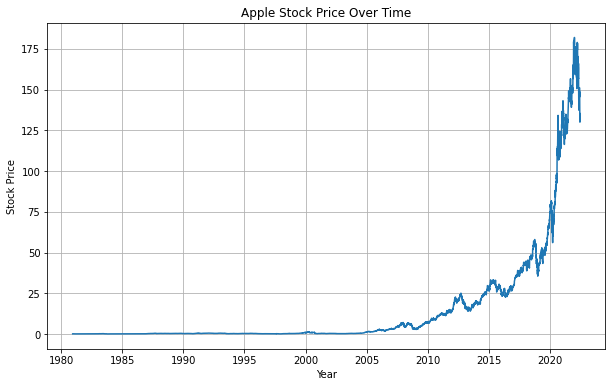

In [8]:
# Overall trend of Apple stock

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the closing stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Apple Stock Price Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

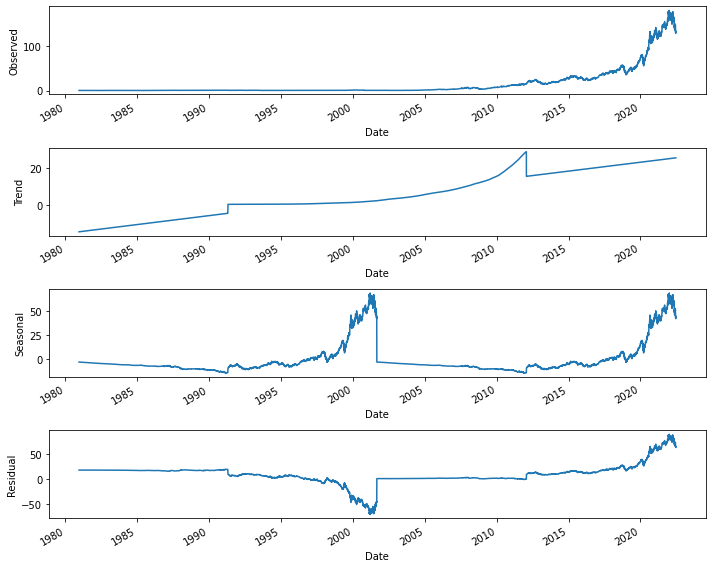

In [9]:
# Seasonal decomposition of apple stock price

from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

new_df = df['Close']

# Perform seasonal decomposition
decomposition = seasonal_decompose(new_df, model='additive', extrapolate_trend='freq', period=int(len(new_df)/2))

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

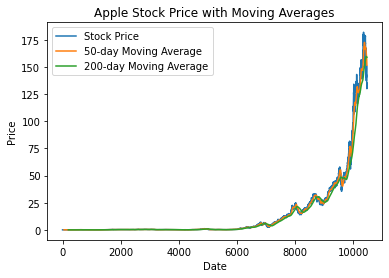

In [10]:
# Moving Average Analysis:
# What is the 50-day moving average of Apple stock price?
# What is the 200-day moving average of Apple stock price?
# How does the stock price of Apple compare to its 50-day and 200-day moving averages over time?

df = pd.read_csv('AAPL.csv')

# Calculate the 50-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Calculate the 200-day moving average
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plot the stock price along with moving averages
plt.plot(df['Close'], label='Stock Price')
plt.plot(df['MA_50'], label='50-day Moving Average')
plt.plot(df['MA_200'], label='200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with Moving Averages')
plt.legend()
plt.show()

In [11]:
# Min and Max price for stock ever

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Find the minimum and maximum stock prices
min_price = df['Close'].min()
max_price = df['Close'].max()

print("Minimum stock price:", min_price)
print("Maximum stock price:", max_price)

Minimum stock price: 0.049107
Maximum stock price: 182.009995


In [12]:
# Overall growth of the company till 2021.

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data up to 2021
df_filtered = df[df['Date'].dt.year <= 2021]

# Calculate the growth rate
initial_price = df_filtered['Close'].iloc[0]
final_price = df_filtered['Close'].iloc[-1]
growth_rate = ((final_price - initial_price) / initial_price) * 100

print("Average growth of the company till 2021:", growth_rate, "%")

Average growth of the company till 2021: 138250.42774332286 %


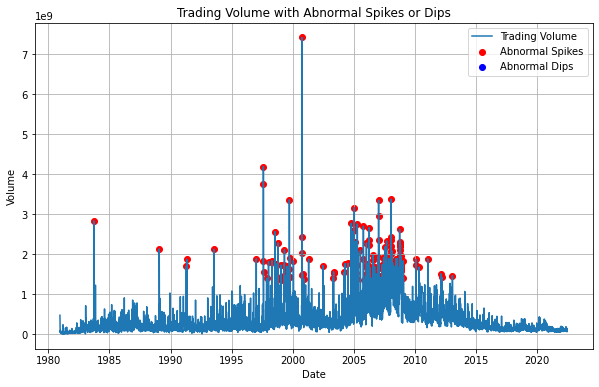

In [13]:
# Abnormal spikes

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate the z-score of trading volume
df['Volume_zscore'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()

# Identify abnormal spikes or dips in trading volume
abnormal_spikes = df[df['Volume_zscore'] > 3]
abnormal_dips = df[df['Volume_zscore'] < -3]

# Plot the trading volume with abnormal spikes or dips
plt.figure(figsize=(10, 6))
plt.plot(df['Volume'], label='Trading Volume')
plt.scatter(abnormal_spikes.index, abnormal_spikes['Volume'], color='red', label='Abnormal Spikes')
plt.scatter(abnormal_dips.index, abnormal_dips['Volume'], color='blue', label='Abnormal Dips')
plt.title('Trading Volume with Abnormal Spikes or Dips')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Which event led to the greatest decline in apple stock?

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Calculate the daily percentage change
df['Daily % Change'] = df['Close'].pct_change() * 100

# Find the date and percentage change with the largest decline
max_decline_date = df.loc[df['Daily % Change'].idxmin(), 'Date']
max_decline_percentage = df.loc[df['Daily % Change'].idxmin(), 'Daily % Change']

print("Date of Greatest Decline:", max_decline_date)
print("Percentage Decline:", max_decline_percentage)

Date of Greatest Decline: 2000-09-29
Percentage Decline: -51.869196541188266


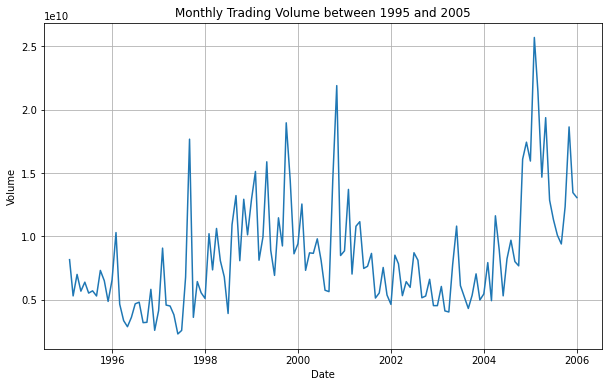

Month with Maximum Spike: 2005-01


In [15]:
# Which has been the event that affected stock price the most ?
#Ans. Ipod shuffle was introduced on 11th jan 2005 which created the biggest spike in apple stock

# Read the dataset
df = pd.read_csv('AAPL.csv')

# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data between 1995 and 2005
df_filtered = df[(df['Date'].dt.year >= 1995) & (df['Date'].dt.year <= 2005)]

# Set 'Date' column as the index
df_filtered.set_index('Date', inplace=True)

# Calculate the monthly trading volume
monthly_volume = df_filtered['Volume'].resample('M').sum()

# Calculate the z-score of monthly trading volume
monthly_volume_zscore = (monthly_volume - monthly_volume.mean()) / monthly_volume.std()

# Identify abnormal spikes or dips in monthly trading volume
abnormal_spikes = monthly_volume_zscore[monthly_volume_zscore > 3]
#abnormal_dips = monthly_volume_zscore[monthly_volume_zscore < -3]

# Find the month with the maximum dip or spike
max_spike_month = abnormal_spikes.idxmax().strftime('%Y-%m')
#max_dip_month = abnormal_dips.idxmin().strftime('%Y-%m')

# Plot the monthly trading volume
plt.figure(figsize=(10, 6))
plt.plot(monthly_volume)
plt.title('Monthly Trading Volume between 1995 and 2005')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

print("Month with Maximum Spike:", max_spike_month)
#print("Month with Maximum Dip:", max_dip_month)

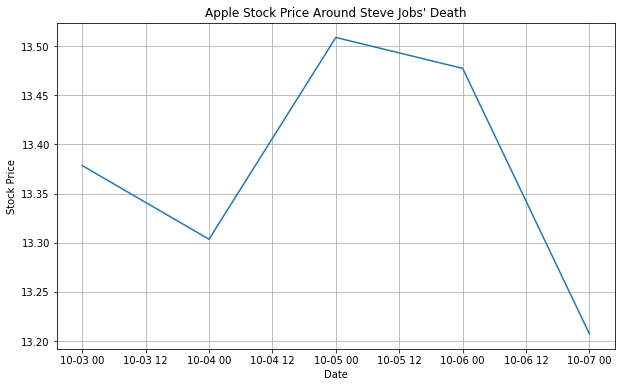

In [16]:
# Analysis on stock price due to Steve Job's demise.

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Define the event date (Steve Jobs' death)
event_date = pd.to_datetime('2011-10-05')

# Select the stock prices around the event date
window_size = 3  # Number of days to include before and after the event
event_prices = df.loc[event_date - pd.DateOffset(days=window_size):event_date + pd.DateOffset(days=window_size), 'Close']

# Plot the stock prices around the event
plt.figure(figsize=(10, 6))
plt.plot(event_prices)
plt.title("Apple Stock Price Around Steve Jobs' Death")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [17]:
# Correlation between Apple stock price and market indices

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Load market indices data (e.g., S&P 500)
df_indices = pd.read_csv('SPX.csv')

df_indices.rename(columns = {'Close': 'S&P500 Close'}, inplace = True)

# Merge the datasets on the common date column
df_merged = pd.merge(df, df_indices, on='Date', how='inner')

# Calculate the correlation between Apple stock price and market indices
correlation = df_merged['Close'].corr(df_merged['S&P500 Close'])

print("Correlation between Apple Stock Price and S&P 500:", correlation)

Correlation between Apple Stock Price and S&P 500: 0.8446942516636644


In [18]:
# Is there a seasonal pattern in the trading volume of Apple's stock based on the month of the year?

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average trading volume by month
average_volume_by_month = df.groupby('Month')['Volume'].mean()

print("Average Trading Volume by Month:")
print(average_volume_by_month)

Average Trading Volume by Month:
Month
1     4.428712e+08
2     3.384299e+08
3     3.250603e+08
4     3.398347e+08
5     3.011649e+08
6     2.985948e+08
7     3.124560e+08
8     2.888558e+08
9     3.304771e+08
10    3.825424e+08
11    3.130816e+08
12    2.989449e+08
Name: Volume, dtype: float64


In [19]:
# Are there any specific months or periods in which Apple's stock experiences higher volatility (measured by the range between the highest and lowest prices)?

# Read the dataset
df = pd.read_csv('AAPL.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the range (difference between the highest and lowest prices) for each month
monthly_range = df.groupby('Month')['High'].max() - df.groupby('Month')['Low'].min()

print("Monthly Volatility (Range) in Apple's Stock Price:")
print(monthly_range)

Monthly Volatility (Range) in Apple's Stock Price:
Month
1     182.860203
2     176.568521
3     179.546943
4     178.424715
5     166.417496
6     151.683085
7     149.950893
8     153.435317
9     157.196379
10    153.103034
11    165.622988
12    182.049090
dtype: float64


<h3>Modeling</h3>  

In [20]:
# Create a new dataframe with only the 'Close' column and Splitting the data
data = df.filter(['Close'])

dataset = data.values

len_train_data = int(np.ceil(len(dataset) * .8))

len_train_data

8375

In [21]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [22]:
# Create the scaled training data set

train_data = trained_scaled_data[0:int(len_train_data), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=14)

Epoch 1/14
260/260 [==============================] - 9s 15ms/step - loss: 1.5416e-05
Epoch 2/14
260/260 [==============================] - 4s 14ms/step - loss: 3.8378e-06
Epoch 3/14
260/260 [==============================] - 4s 14ms/step - loss: 3.0728e-06
Epoch 4/14
260/260 [==============================] - 4s 14ms/step - loss: 2.8702e-06
Epoch 5/14
260/260 [==============================] - 4s 14ms/step - loss: 2.4235e-06
Epoch 6/14
260/260 [==============================] - 4s 14ms/step - loss: 2.1802e-06
Epoch 7/14
260/260 [==============================] - 3s 13ms/step - loss: 2.3603e-06
Epoch 8/14
260/260 [==============================] - 3s 13ms/step - loss: 2.6805e-06
Epoch 9/14
260/260 [==============================] - 3s 13ms/step - loss: 2.1484e-06
Epoch 10/14
260/260 [==============================] - 3s 13ms/step - loss: 1.9628e-06
Epoch 11/14
260/260 [==============================] - 3s 13ms/step - loss: 1.5690e-06
Epoch 12/14
260/260 [==============================]

In [24]:
# Create the testing data set.

test_data = trained_scaled_data[len_train_data - 60: , :]

x_test = []
y_test = dataset[len_train_data:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

# Reshaping the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

66/66 [==============================] - 1s 6ms/step


3.3154665091850224

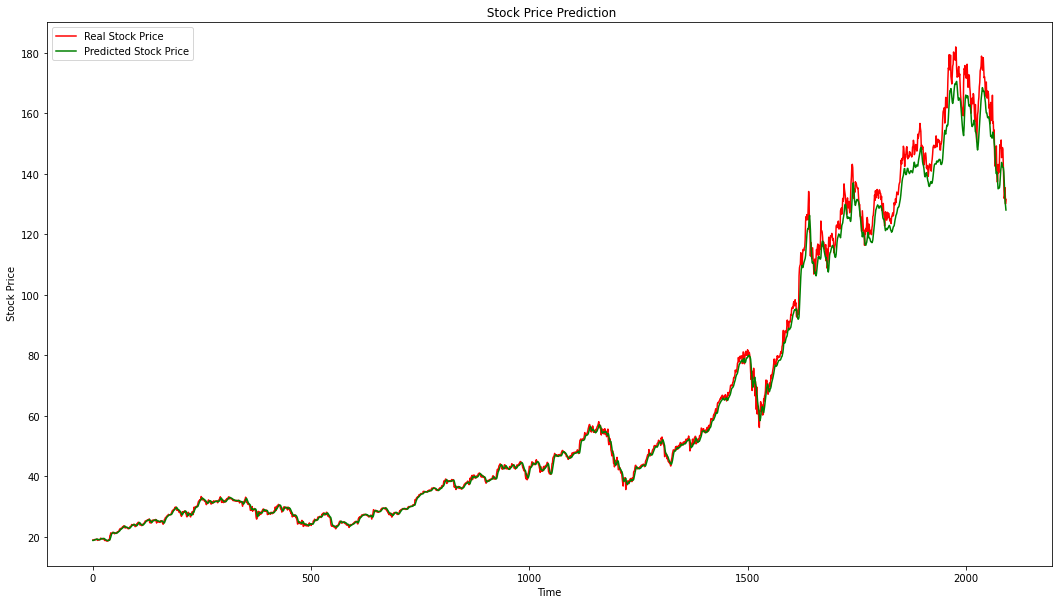

In [25]:
# Plotting prediction v/s actual

plt.figure(figsize=(18, 10))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()